# 📶Telecom Churn Case Study

# ❓Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

# 🎯Business Objective

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Importing the Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
data = pd.read_csv('telecom_churn_data.csv')

In [3]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
data.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [6]:
# Making a copy of the dataset so that we have the original one available after manipulations
data_copy = data.copy()

In [7]:
all_columns = data.columns.tolist()

## Filtering High Value Customers

**Defining High Value Customers: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).**

In [8]:
rech_col = [col for col in all_columns if 'rech' in col]
rech_col

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

On giving a high level look into the data, we see that we have the data available for Total Recharge Amount for Talktime but not for Recharge Amount of Data.

Calculating that amount:

In [9]:
data['total_data_rech_amt_6'] = data['av_rech_amt_data_6'] * data['total_rech_data_6']
data['total_data_rech_amt_7'] = data['av_rech_amt_data_7'] * data['total_rech_data_7']
data['total_data_rech_amt_8'] = data['av_rech_amt_data_8'] * data['total_rech_data_8']
data['total_data_rech_amt_9'] = data['av_rech_amt_data_9'] * data['total_rech_data_9']

Dropping the columns already being used in `total_data_rech_amt_6`, `total_data_rech_amt_7`, `total_data_rech_amt_8` and `total_data_rech_amt_9`

In [10]:
data.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
           'av_rech_amt_data_6','av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], 
          axis=1, inplace=True)

### Calculating the Average recharge amount for good phase i.e 6th and 7th month

In [11]:
good_phase_average_rech_amt = (data['total_rech_amt_6'].fillna(0) + data['total_rech_amt_7'].fillna(0) + data['total_data_rech_amt_6'].fillna(0) + data['total_data_rech_amt_7'].fillna(0))/2

**Finding the 70th percentile of the avg_rech_amt_6_7**

In [12]:
good_phase_avg_rech_amt_70 = np.percentile(good_phase_average_rech_amt, 70.0)
print(f'70 Percentile of recharge amount is : {good_phase_avg_rech_amt_70}')

70 Percentile of recharge amount is : 478.0


**Filtering Out High Value Customers**

In [13]:
data = data[good_phase_average_rech_amt >= good_phase_avg_rech_amt_70]
print(f'Shape of high value customer data: {data.shape}')

Shape of high value customer data: (30001, 222)


### Tagging the Churn Customers

**The churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:**

**total_ic_mou_9**

**total_og_mou_9**

**vol_2g_mb_9**

**vol_3g_mb_9**

In [14]:
# Seperating columns for the 9th month(Churn Phase)
month9_cols = [col for col in all_columns if '9' in col]

# Seperating the incoming columns 
month9_ic_cols = [col for col in month9_cols if 'ic' in col and 'mou' in col]

# Seperating the outgoing columns
month9_og_cols = [col for col in month9_cols if 'og' in col and 'mou' in col]

# Seperating volume(data) columns
month9_vol_cols = [col for col in month9_cols if 'vol' in col and 'mb' in col]

In [15]:
# Sum of all the ic columns
data['ic_sum'] = data[month9_ic_cols].sum(axis = 1)

# Sum of all the oc columns
data['og_sum'] = data[month9_og_cols].sum(axis = 1)

# Sum of all the vol columns
data['vol_sum'] = data[month9_vol_cols].sum(axis = 1)

In [16]:
churn_tag_cols = ['vol_sum', 'og_sum', 'ic_sum']

**Creating churn as the sum of newly aggregrated columns. According to the conditions of determining the churn, if the use has used any of the mentioned service, the sum will be greater than 1.**

In [17]:
data['churn'] = data[churn_tag_cols].sum(axis = 1)

data.head(15)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,ic_sum,og_sum,vol_sum,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252

In [18]:
# If the churn value is greater than 0, it means the user used a service which directly implies that the user is still using the services
data['churn'] = data['churn'].apply(lambda x: 1 if x == 0 else 0)
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,ic_sum,og_sum,vol_sum,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252

**Dropping Month 9 columns used to derive churn column**

In [19]:
data.drop([col for col in month9_cols + churn_tag_cols if col not in ['total_rech_data_9', 'av_rech_amt_data_9']],
            axis=1, inplace=True)
data.shape

(30001, 171)

## Data Cleaning and Feature Engineering

In [20]:
# Checking for missing values
missing_values = round(data.isna().sum() / len(data) * 100, 2).sort_values(ascending=False)
missing_values

total_data_rech_amt_9       49.27
total_data_rech_amt_8       46.83
arpu_2g_8                   46.83
date_of_last_rech_data_8    46.83
arpu_3g_8                   46.83
max_rech_data_8             46.83
fb_user_8                   46.83
count_rech_3g_8             46.83
night_pck_user_8            46.83
count_rech_2g_8             46.83
date_of_last_rech_data_6    44.15
count_rech_3g_6             44.15
arpu_2g_6                   44.15
arpu_3g_6                   44.15
fb_user_6                   44.15
count_rech_2g_6             44.15
max_rech_data_6             44.15
total_data_rech_amt_6       44.15
night_pck_user_6            44.15
count_rech_3g_7             43.15
count_rech_2g_7             43.15
arpu_3g_7                   43.15
max_rech_data_7             43.15
arpu_2g_7                   43.15
date_of_last_rech_data_7    43.15
night_pck_user_7            43.15
total_data_rech_amt_7       43.15
fb_user_7                   43.15
loc_og_t2t_mou_8             3.91
loc_og_mou_8  

In [21]:
# Dropping features with more than 40% missing values
cols_to_drop = missing_values[missing_values > 40].index.tolist()
cols_to_drop

['total_data_rech_amt_9',
 'total_data_rech_amt_8',
 'arpu_2g_8',
 'date_of_last_rech_data_8',
 'arpu_3g_8',
 'max_rech_data_8',
 'fb_user_8',
 'count_rech_3g_8',
 'night_pck_user_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_6',
 'count_rech_3g_6',
 'arpu_2g_6',
 'arpu_3g_6',
 'fb_user_6',
 'count_rech_2g_6',
 'max_rech_data_6',
 'total_data_rech_amt_6',
 'night_pck_user_6',
 'count_rech_3g_7',
 'count_rech_2g_7',
 'arpu_3g_7',
 'max_rech_data_7',
 'arpu_2g_7',
 'date_of_last_rech_data_7',
 'night_pck_user_7',
 'total_data_rech_amt_7',
 'fb_user_7']

In [22]:
data.drop(cols_to_drop, axis=1, inplace=True)

In [23]:
data.shape

(30001, 143)

In [24]:
# Checking missing values
missing_values = round(data.isna().sum() / len(data) * 100, 2).sort_values(ascending=False)
missing_values

loc_og_mou_8            3.91
loc_og_t2t_mou_8        3.91
loc_og_t2f_mou_8        3.91
loc_og_t2c_mou_8        3.91
ic_others_8             3.91
isd_ic_mou_8            3.91
spl_ic_mou_8            3.91
std_ic_mou_8            3.91
std_ic_t2o_mou_8        3.91
std_ic_t2f_mou_8        3.91
std_ic_t2m_mou_8        3.91
std_ic_t2t_mou_8        3.91
loc_ic_mou_8            3.91
loc_ic_t2f_mou_8        3.91
loc_ic_t2m_mou_8        3.91
loc_ic_t2t_mou_8        3.91
std_og_t2t_mou_8        3.91
og_others_8             3.91
spl_og_mou_8            3.91
isd_og_mou_8            3.91
std_og_mou_8            3.91
std_og_t2c_mou_8        3.91
std_og_t2f_mou_8        3.91
loc_og_t2m_mou_8        3.91
std_og_t2m_mou_8        3.91
roam_ic_mou_8           3.91
onnet_mou_8             3.91
roam_og_mou_8           3.91
offnet_mou_8            3.91
date_of_last_rech_8     1.94
std_ic_t2m_mou_6        1.82
std_ic_t2o_mou_6        1.82
offnet_mou_6            1.82
std_ic_t2f_mou_6        1.82
loc_og_t2t_mou

**Since the proportion of data missing is too low to even consider it for an imputation, we are going to directly drop the rows with missing values.**

In [25]:
# Dropping rows with missing values
for col in data.columns:
    data = data[~data[col].isna()]

In [26]:
# Rechecking missing values
round(data.isna().sum() / len(data) * 100, 2).sort_values(ascending=False)

churn                   0.0
std_og_t2f_mou_6        0.0
std_og_mou_6            0.0
std_og_t2c_mou_8        0.0
std_og_t2c_mou_7        0.0
std_og_t2c_mou_6        0.0
std_og_t2f_mou_8        0.0
std_og_t2f_mou_7        0.0
std_og_t2m_mou_8        0.0
std_og_mou_8            0.0
std_og_t2m_mou_7        0.0
std_og_t2m_mou_6        0.0
std_og_t2t_mou_8        0.0
std_og_t2t_mou_7        0.0
std_og_t2t_mou_6        0.0
loc_og_mou_8            0.0
std_og_mou_7            0.0
isd_og_mou_6            0.0
loc_og_mou_6            0.0
total_og_mou_6          0.0
loc_ic_t2m_mou_6        0.0
loc_ic_t2t_mou_8        0.0
loc_ic_t2t_mou_7        0.0
loc_ic_t2t_mou_6        0.0
total_og_mou_8          0.0
total_og_mou_7          0.0
og_others_8             0.0
isd_og_mou_7            0.0
og_others_7             0.0
og_others_6             0.0
spl_og_mou_8            0.0
spl_og_mou_7            0.0
spl_og_mou_6            0.0
isd_og_mou_8            0.0
loc_og_mou_7            0.0
loc_og_t2c_mou_8    

In [27]:
data.shape

(28163, 143)

**Dropping `last_date_of_month_6`,`last_date_of_month_7`, and `last_date_of_month_8` along with `date_of_last_rech_6`, `date_of_last_rech_7`, and `date_of_last_rech_8` since they do not add any business value.**

In [28]:
data.drop(data[['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                'date_of_last_rech_6','date_of_last_rech_7', 'date_of_last_rech_8' ]], 
                  axis=1, inplace=True)

In [29]:
data.shape

(28163, 137)

In [30]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.0,0.0,0.0,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.00,0.

In [31]:
data['circle_id'].value_counts()

109    28163
Name: circle_id, dtype: int64

**Looks like there is only 1 unique value in the column `circle_id`. It might be possible that more columns follow this trend.**

In [32]:
# Checking columns to see how many columns have only 1 unique variable
single_value_cols = []

for col in data.columns:
    if data[f'{col}'].nunique() == 1:
        single_value_cols.append(col)

single_value_cols

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [33]:
len(single_value_cols)

10

**Looks like te above mentioned 10 columns have only 1 unique value. An attribute can't add business value with just one unique value. It makes sense to drop these attributes.**

In [34]:
data.drop(data[single_value_cols], axis=1, inplace=True)

In [35]:
data.shape

(28163, 127)

**Dropping `mobile_number` as it does not add any business value and acts as a unique identifier.** 

In [36]:
data.drop('mobile_number', axis=1, inplace=True)

**Converting AON(Age on Network) to years from days.**

In [37]:
data['aon'] = data['aon'].apply(lambda x : round((x/365),1))

In [38]:
data.shape

(28163, 126)

## Correlation Analysis

In [39]:
corr = data.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_correlation_cols = corr[(corr > 0.60) | (corr < -0.60)]
high_correlation_cols

arpu_7              arpu_6              0.728704
arpu_8              arpu_6              0.671437
                    arpu_7              0.778413
onnet_mou_7         onnet_mou_6         0.770224
onnet_mou_8         onnet_mou_6         0.646114
                    onnet_mou_7         0.811314
offnet_mou_7        offnet_mou_6        0.755880
offnet_mou_8        offnet_mou_6        0.605742
                    offnet_mou_7        0.772001
roam_ic_mou_8       roam_ic_mou_7       0.618233
roam_og_mou_6       roam_ic_mou_6       0.647696
roam_og_mou_8       roam_og_mou_7       0.605246
loc_og_t2t_mou_7    loc_og_t2t_mou_6    0.801091
loc_og_t2t_mou_8    loc_og_t2t_mou_6    0.708473
                    loc_og_t2t_mou_7    0.836495
loc_og_t2m_mou_7    loc_og_t2m_mou_6    0.790918
loc_og_t2m_mou_8    loc_og_t2m_mou_6    0.698190
                    loc_og_t2m_mou_7    0.826281
loc_og_t2f_mou_7    loc_og_t2f_mou_6    0.812776
loc_og_t2f_mou_8    loc_og_t2f_mou_6    0.674290
                    

**Consolidating a list of columns to drop as per the high correlations.**

In [40]:
high_corr_cols = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']
len(high_corr_cols)

40

In [41]:
# Dropping highly correlated attributes
data.drop(data[high_corr_cols], axis=1, inplace=True)

In [42]:
data.shape

(28163, 87)

**Deriving new features**

In [43]:
# Creating a total mou by combining offnet and onnnet mou

data['total_mou_6'] = data['onnet_mou_6'] + data['offnet_mou_6']
data['total_mou_7'] = data['onnet_mou_7'] + data['offnet_mou_7']
data['total_mou_8'] = data['onnet_mou_8'] + data['offnet_mou_8']

# Dropping the redundant columns
data.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

data.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_mou_6,total_mou_7,total_mou_8
7,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,422.16,533.91,255.79,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2.2,57.74,19.38,18.74,0.0,1,511.27,621.84,378.20
8,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.00,356.00,0.03,0,1,0,0,1,3,0,0,0,0,0,0,0.9,21.03,910.65,122.16,0.0,0,508.35,431.66,171.56
21,514.453,597.753,637.760,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.04,94.09,129.74,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,125.33,87.68,159.11,14.06,5.98,0.18,0.00,0.00,0.00,81.76,44.21,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0.00,0.00,0.00,0.0,0,860.34,1028.79,1068.53
23,74.350,193.897,366.966,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,116.63,174.41,224.21,0.51,0.00,13.38,0.00,0.00,0.00,2.94,14.89,57.29,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,0,179,0,0.00,0.48,0.01,0,0,0,0,0,0,0,2,1,0,0,1,1.7,40.45,51.86,0.00,0.0,0,134.37,140.02,239.47
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.56,0.0,0.0,0.0,3.48,0.88,40.54,0.00,2.91,0.05,0.23,0.96,0.13,3.18,5.66,1.04,0.00,0.0,0.0,0.00,0.00,0.00,1.23,0.65,0.20,7,14,1,252,1255,455,252,0,455,87.05,57.76,7.97,0,0,0,0,0,0,4,5,1,1,3,0,3.6,358.10,2706.83,1714.67,0.0,0,0.00,0.00,0.00


**Since the `good phase` consists of two months, it makes sense to combine these two by averaging them.**

In [44]:
cols_for_good_phase = [col[:-2] for col in data.columns if '6' in col or '7' in col]
cols_for_good_phase

['arpu',
 'arpu',
 'roam_ic_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'roam_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'loc_og_mou',
 'std_og_t2f_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'std_og_mou',
 'isd_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'spl_og_mou',
 'og_others',
 'og_others',
 'loc_ic_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2t_mou',
 'std_ic_t2f_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'std_ic_mou',
 'spl_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'ic_others',
 'total_rech_num',
 'total_rech_num',
 'max_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'last_day_rch_amt',
 'vol_2g_mb',
 'vol_2g_mb',
 'monthly_2g',
 'monthly_2g',
 'sachet_2g',
 'sachet_2g',
 'monthly_3g',
 'monthly_3g',
 'sachet_3g',
 'sachet_3g',
 'total_mou',
 'total_mou']

In [45]:
# Creating new features and droppinp the redundant columns
for col in set(cols_for_good_phase):
    data[f'good_phase_{col}'] = (data[f'{col}_6'] + data[f'{col}_7'] ) / 2
    data.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
data.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_mou_8,good_phase_sachet_2g,good_phase_std_og_t2f_mou,good_phase_isd_ic_mou,good_phase_std_ic_t2f_mou,good_phase_std_og_mou,good_phase_loc_ic_mou,good_phase_spl_og_mou,good_phase_total_rech_num,good_phase_arpu,good_phase_sachet_3g,good_phase_og_others,good_phase_monthly_3g,good_phase_loc_og_mou,good_phase_vol_2g_mb,good_phase_total_mou,good_phase_std_ic_t2t_mou,good_phase_std_ic_mou,good_phase_isd_og_mou,good_phase_spl_ic_mou,good_phase_max_rech_amt,good_phase_roam_og_mou,good_phase_loc_og_t2c_mou,good_phase_roam_ic_mou,good_phase_last_day_rch_amt,good_phase_monthly_2g,good_phase_ic_others
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,2.2,57.74,19.38,18.74,0.0,1,378.20,0.0,13.37,8.295,43.215,68.000,391.555,2.25,5.0,1209.5150,0.0,0.0,0.0,478.035,0.000,566.555,24.360,176.810,0.090,0.105,1185.0,18.165,0.0,24.86,0.0,0.0,15.465
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,0.9,21.03,910.65,122.16,0.0,0,171.56,0.5,0.00,0.000,0.000,136.870,52.630,0.00,20.0,435.4720,0.0,0.0,0.0,333.135,178.000,470.005,0.290,13.545,0.000,0.000,122.0,0.000,0.0,0.00,25.0,0.5,0.000
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,2.0,0.00,0.00,0.00,0.0,0,1068.53,0.0,0.00,0.000,0.000,848.990,106.505,0.00,24.0,556.1030,0.0,0.0,0.0,95.565,0.000,944.565,10.020,62.985,0.000,0.000,50.0,0.000,0.0,0.00,25.0,0.0,0.000
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,1.7,40.45,51.86,0.00,0.0,0,239.47,0.0,0.00,14.115,0.000,4.355,145.520,0.05,4.0,134.1235,0.0,0.0,1.0,132.795,0.240,137.195,0.255,8.915,0.005,0.000,89.5,0.000,0.0,0.00,89.5,0.0,2.675
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,3.6,358.10,2706.83,1714.67,0.0,0,0.00,0.0,0.00,0.000,0.595,0.000,2.180,0.00,10.5,1669.9265,2.0,0.0,4.5,0.000,72.405,0.000,1.455,4.420,0.000,0.000,753.5,0.000,0.0,0.00,126.0,0.0,0.940


In [46]:
data.shape

(28163, 58)

In [47]:
vbc_cols = [col for col in data.columns if 'vbc' in col]
vbc_cols

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

**Looks like the `vbc` columns are not attributed with any of the phases. Modifying the columns to fit the norm.**

In [48]:
# Creating a new column
data['good_phase_vbc_3g'] = (data['jul_vbc_3g'] + data['jun_vbc_3g']) / 2

# Dropping the redundant columns
data.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

# Renaming the August column for vbc to vbc_3g_8
data.rename({'aug_vbc_3g': 'vbc_3g_8'}, inplace=True)

data.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,churn,total_mou_8,good_phase_sachet_2g,good_phase_std_og_t2f_mou,good_phase_isd_ic_mou,good_phase_std_ic_t2f_mou,good_phase_std_og_mou,good_phase_loc_ic_mou,good_phase_spl_og_mou,good_phase_total_rech_num,good_phase_arpu,good_phase_sachet_3g,good_phase_og_others,good_phase_monthly_3g,good_phase_loc_og_mou,good_phase_vol_2g_mb,good_phase_total_mou,good_phase_std_ic_t2t_mou,good_phase_std_ic_mou,good_phase_isd_og_mou,good_phase_spl_ic_mou,good_phase_max_rech_amt,good_phase_roam_og_mou,good_phase_loc_og_t2c_mou,good_phase_roam_ic_mou,good_phase_last_day_rch_amt,good_phase_monthly_2g,good_phase_ic_others,good_phase_vbc_3g
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,2.2,57.74,1,378.20,0.0,13.37,8.295,43.215,68.000,391.555,2.25,5.0,1209.5150,0.0,0.0,0.0,478.035,0.000,566.555,24.360,176.810,0.090,0.105,1185.0,18.165,0.0,24.86,0.0,0.0,15.465,19.060
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,0.9,21.03,0,171.56,0.5,0.00,0.000,0.000,136.870,52.630,0.00,20.0,435.4720,0.0,0.0,0.0,333.135,178.000,470.005,0.290,13.545,0.000,0.000,122.0,0.000,0.0,0.00,25.0,0.5,0.000,516.405
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,2.0,0.00,0,1068.53,0.0,0.00,0.000,0.000,848.990,106.505,0.00,24.0,556.1030,0.0,0.0,0.0,95.565,0.000,944.565,10.020,62.985,0.000,0.000,50.0,0.000,0.0,0.00,25.0,0.0,0.000,0.000
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,1.7,40.45,0,239.47,0.0,0.00,14.115,0.000,4.355,145.520,0.05,4.0,134.1235,0.0,0.0,1.0,132.795,0.240,137.195,0.255,8.915,0.005,0.000,89.5,0.000,0.0,0.00,89.5,0.0,2.675,25.930
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,3.6,358.10,0,0.00,0.0,0.00,0.000,0.595,0.000,2.180,0.00,10.5,1669.9265,2.0,0.0,4.5,0.000,72.405,0.000,1.455,4.420,0.000,0.000,753.5,0.000,0.0,0.00,126.0,0.0,0.940,2210.750


In [49]:
data.shape

(28163, 56)

In [50]:
data.describe()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,churn,total_mou_8,good_phase_sachet_2g,good_phase_std_og_t2f_mou,good_phase_isd_ic_mou,good_phase_std_ic_t2f_mou,good_phase_std_og_mou,good_phase_loc_ic_mou,good_phase_spl_og_mou,good_phase_total_rech_num,good_phase_arpu,good_phase_sachet_3g,good_phase_og_others,good_phase_monthly_3g,good_phase_loc_og_mou,good_phase_vol_2g_mb,good_phase_total_mou,good_phase_std_ic_t2t_mou,good_phase_std_ic_mou,good_phase_isd_og_mou,good_phase_spl_ic_mou,good_phase_max_rech_amt,good_phase_roam_og_mou,good_phase_loc_og_t2c_mou,good_phase_roam_ic_mou,good_phase_last_day_rch_amt,good_phase_monthly_2g,good_phase_ic_others,good_phase_vbc_3g
count,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000
mean,528.992500,13.145865,20.926258,1.789363,247.845569,1.646062,322.121339,1.989213,6.889342,0.061151,235.639315,14.625113,2.692254,46.761176,0.027889,11.437856,1.291328,10.435323,164.597131,94.779640,109.831129,0.160210,1.100771,0.209459,0.208287,3.378969,173.745705,0.028229,597.378280,1.154618,1.840391,11.458002,2.835280,362.567597,241.031533,6.610121,12.026489,567.163074,0.217200,0.359434,0.213773,263.016895,127.717157,656.094111,15.535415,49.261396,2.047679,0.041413,167.748198,23.757457,1.766261,14.632102,98.522885,0.183397,1.371220,169.310408
std,500.479643,76.125433,107.722393,7.390599,367.353912,11.126142,615.275135,45.888765,20.813297,3.421503,313.175366,73.017056,20.476161,142.430462,0.113430,72.276371,13.164084,9.288002,169.014286,141.789453,317.809110,0.413067,2.573361,0.619138,1.116503,2.638436,424.621028,0.165628,706.447419,2.435548,11.647474,74.792010,18.312495,586.639498,303.003271,17.610173,8.650631,431.807280,0.940707,2.533710,0.565446,361.575126,304.044111,657.870003,76.790814,135.463961,45.536401,0.154356,148.011960,94.459260,6.536779,66.404361,108.064480,0.392058,14.081974,395.513994
min,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-451.713500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,258.075500,0.000000,0.000000,0.000000,31.410000,0.000000,0.000000,0.000000,0.000000,0.000000,51.185000,0.000000,0.000000,0.940000,0.000000,0.000000,0.000000,4.000000,67.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.000000,0.000000,117.170000,0.000000,0.000000,0.000000,0.000000,2.450000,62.502500,0.000000,6.500000,355.689750,0.000000,0.000000,0.000000,45.762500,0.000000,178.822500,0.000000,2.955000,0.000000,0.000000,104.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000
50%,445.338000,0.000000,0.000000,0.000000,124.060000,0.000000,34.990000,0.000000,0.700000,0.000000,140.310000,0.330000,

**observation**
* It can be observed that every columns has some outliers, most of them are because there are 0.0 as the service was not used since we don't have the resource to check the factfullness of the data, we will cap those features

## Univariate Analysis

In [69]:
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8', 
               'good_phase_loc_ic_mou', 'good_phase_last_day_rch_amt', 'good_phase_std_og_mou', 'good_phase_max_rech_amt', 
              'good_phase_loc_og_mou', 'good_phase_arpu']

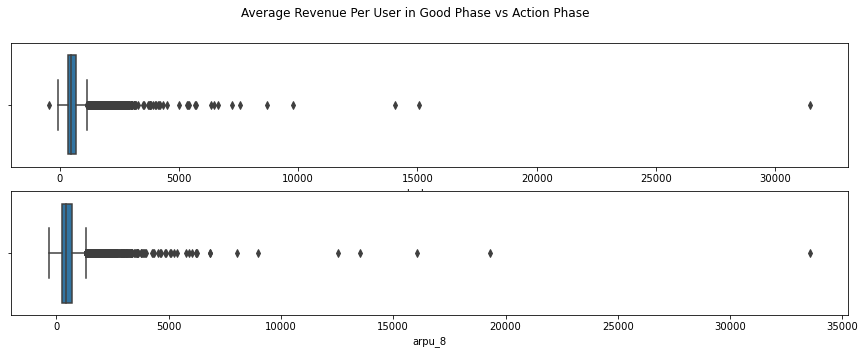

In [52]:
fig, axes = plt.subplots(2,1, figsize=(15, 5))

fig.suptitle('Average Revenue Per User in Good Phase vs Action Phase')

sns.boxplot(data['good_phase_arpu'], ax=axes[0])
sns.boxplot(data['arpu_8'], ax=axes[1])
plt.show()

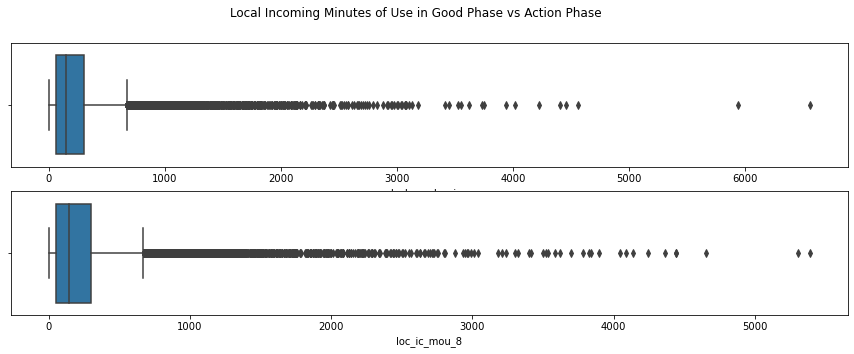

In [53]:
fig, axes = plt.subplots(2,1, figsize=(15, 5))

fig.suptitle('Local Incoming Minutes of Use in Good Phase vs Action Phase')

sns.boxplot(data['good_phase_loc_ic_mou'], ax=axes[0])
sns.boxplot(data['loc_ic_mou_8'], ax=axes[1])
plt.show()

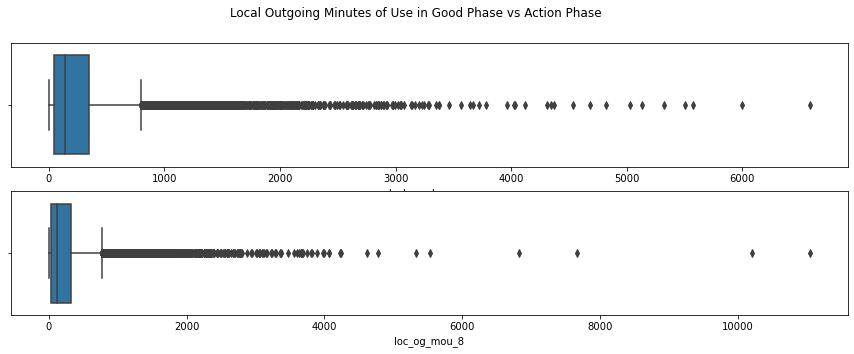

In [54]:
fig, axes = plt.subplots(2,1, figsize=(15, 5))

fig.suptitle('Local Outgoing Minutes of Use in Good Phase vs Action Phase')

sns.boxplot(data['good_phase_loc_og_mou'], ax=axes[0])
sns.boxplot(data['loc_og_mou_8'], ax=axes[1])
plt.show()

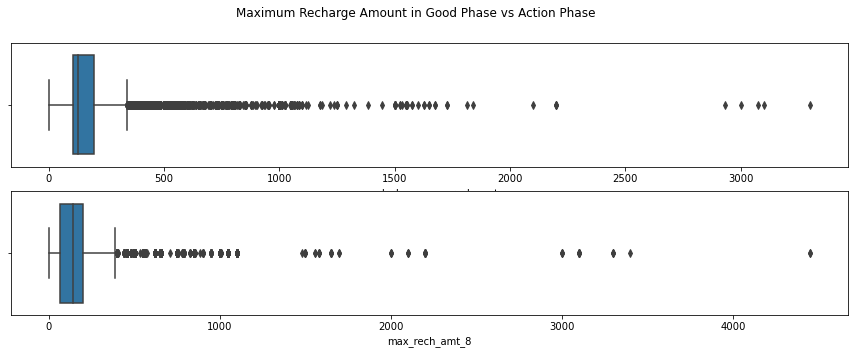

In [55]:
fig, axes = plt.subplots(2,1, figsize=(15, 5))

fig.suptitle('Maximum Recharge Amount in Good Phase vs Action Phase')

sns.boxplot(data['good_phase_max_rech_amt'], ax=axes[0])
sns.boxplot(data['max_rech_amt_8'], ax=axes[1])
plt.show()

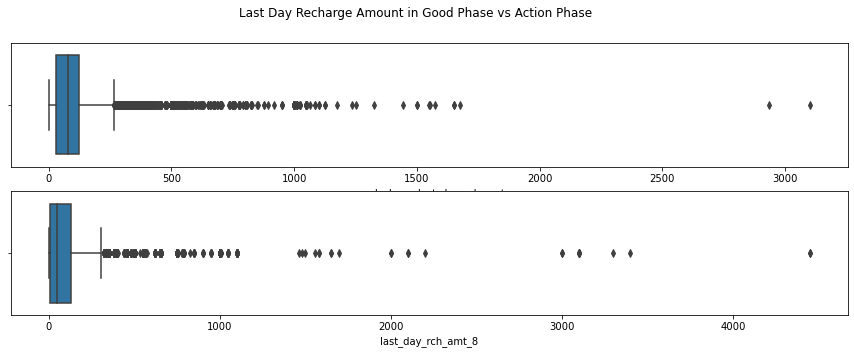

In [56]:
fig, axes = plt.subplots(2,1, figsize=(15, 5))

fig.suptitle('Last Day Recharge Amount in Good Phase vs Action Phase')

sns.boxplot(data['good_phase_last_day_rch_amt'], ax=axes[0])
sns.boxplot(data['last_day_rch_amt_8'], ax=axes[1])
plt.show()

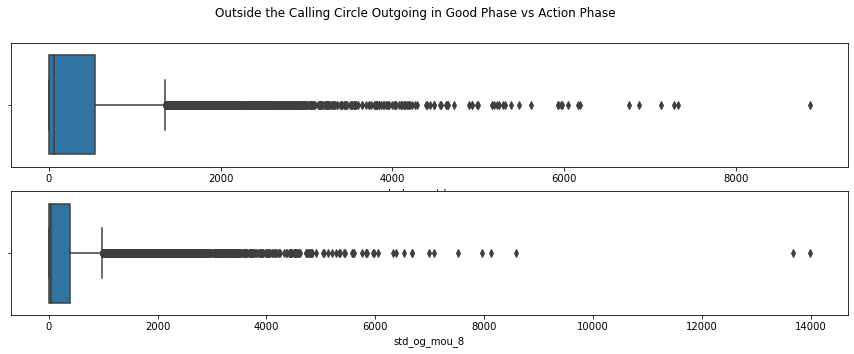

In [57]:
fig, axes = plt.subplots(2,1, figsize=(15, 5))

fig.suptitle('Outside the Calling Circle Outgoing in Good Phase vs Action Phase')

sns.boxplot(data['good_phase_std_og_mou'], ax=axes[0])
sns.boxplot(data['std_og_mou_8'], ax=axes[1])
plt.show()

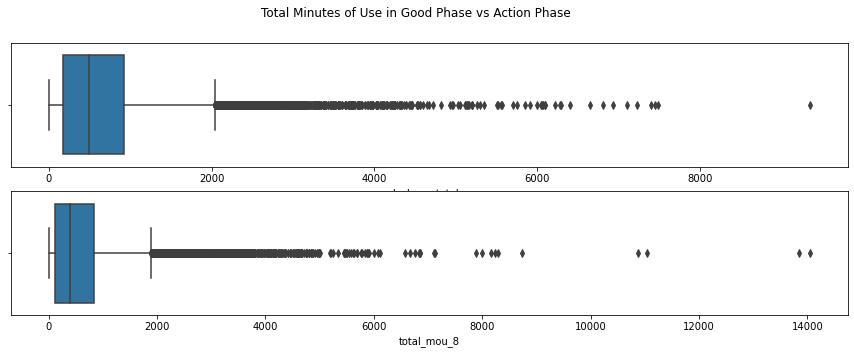

In [58]:
fig, axes = plt.subplots(2,1, figsize=(15, 5))

fig.suptitle('Total Minutes of Use in Good Phase vs Action Phase')

sns.boxplot(data['good_phase_total_mou'], ax=axes[0])
sns.boxplot(data['total_mou_8'], ax=axes[1])
plt.show()

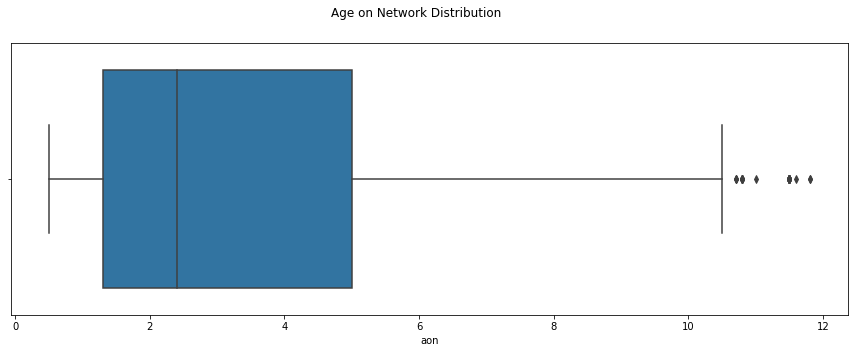

In [59]:
fig, axes = plt.subplots(figsize=(15, 5))

fig.suptitle('Age on Network Distribution')

axes = sns.boxplot(data['aon'])
plt.show()

## Bivariate Analysis

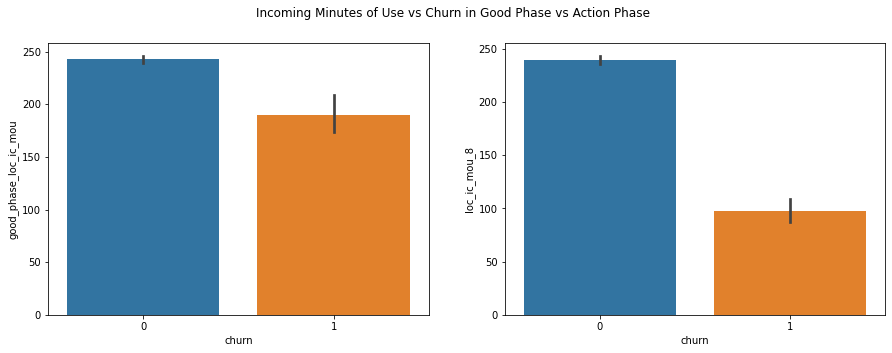

In [60]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

fig.suptitle('Incoming Minutes of Use vs Churn in Good Phase vs Action Phase')

sns.barplot(x = data['churn'], y = data['good_phase_loc_ic_mou'], ax=axes[0])
sns.barplot(x = data['churn'], y= data['loc_ic_mou_8'], ax=axes[1])
plt.show()

**Inference: It is quite evident from the above plot that Incoming Minutes of Use has drastically dropped in the Action Phase as compared to Good Phase.**

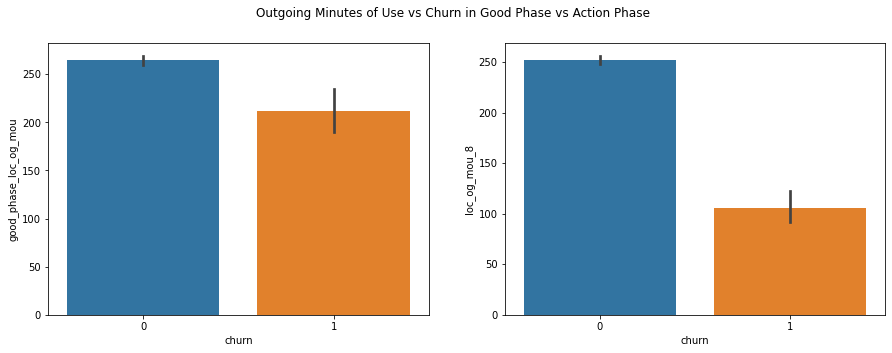

In [61]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

fig.suptitle('Outgoing Minutes of Use vs Churn in Good Phase vs Action Phase')

sns.barplot(x = data['churn'], y = data['good_phase_loc_og_mou'], ax=axes[0])
sns.barplot(x = data['churn'], y= data['loc_og_mou_8'], ax=axes[1])
plt.show()

**Inference: It is quite evident from the above plot the Outgoing Minutes of Use has drastically dropped in the Action Phase as compared to Good Phase.**

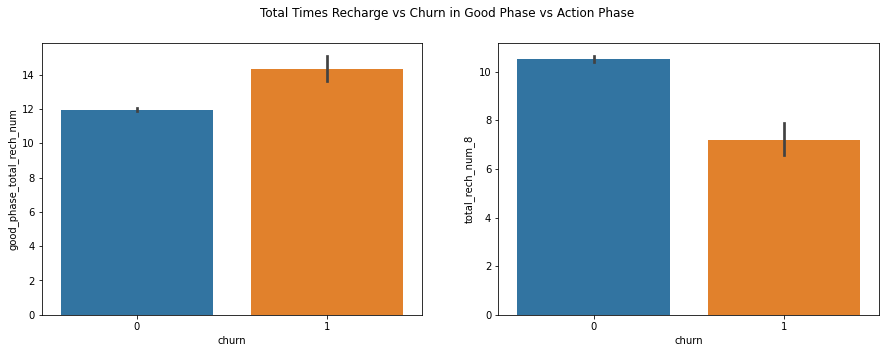

In [62]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

fig.suptitle('Total Times Recharge vs Churn in Good Phase vs Action Phase')

sns.barplot(x = data['churn'], y = data['good_phase_total_rech_num'], ax=axes[0])
sns.barplot(x = data['churn'], y= data['total_rech_num_8'], ax=axes[1])
plt.show()

**Inference: It is quite evident from the above plot that the Total Times Recharge has drastically dropped in the Action Phase as compared to Good Phase and that too for both churners and non-churners.**

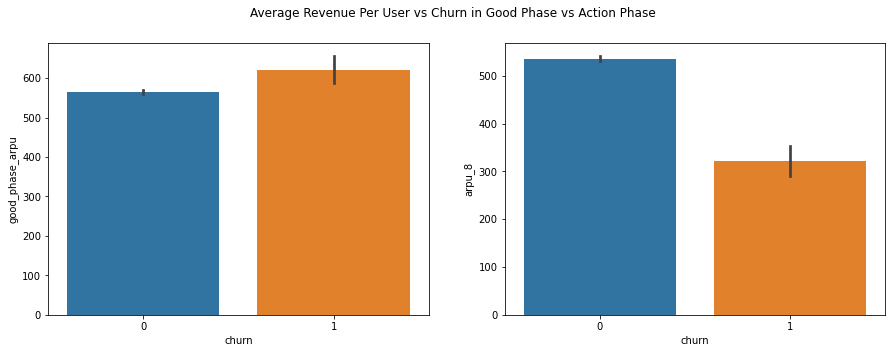

In [63]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

fig.suptitle('Average Revenue Per User vs Churn in Good Phase vs Action Phase')

sns.barplot(x = data['churn'], y = data['good_phase_arpu'], ax=axes[0])
sns.barplot(x = data['churn'], y= data['arpu_8'], ax=axes[1])
plt.show()

**Inference: It is quite evident from the above plot that Average Revenue Per User has drastically dropped in the Action Phase as compared to Good Phase.**

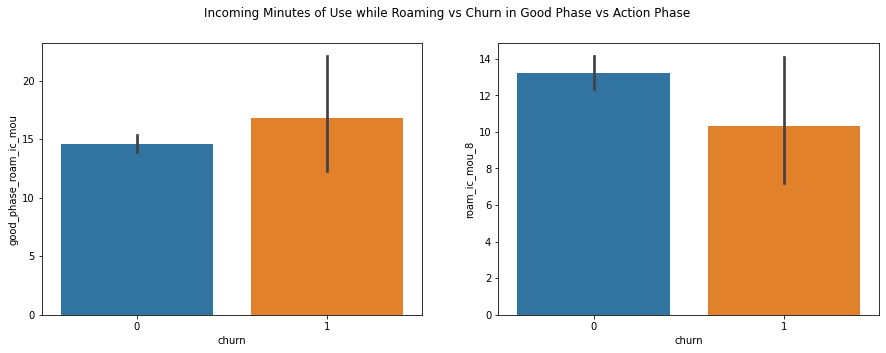

In [64]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

fig.suptitle('Incoming Minutes of Use while Roaming vs Churn in Good Phase vs Action Phase')

sns.barplot(x = data['churn'], y = data['good_phase_roam_ic_mou'], ax=axes[0])
sns.barplot(x = data['churn'], y= data['roam_ic_mou_8'], ax=axes[1])
plt.show()

**Inference: This is an intresting plot. Incoming Minutes of Use while roaming has remained constant for churners but seems to have increased for non-chruners in the Action Phase as compared to Good Phase.**

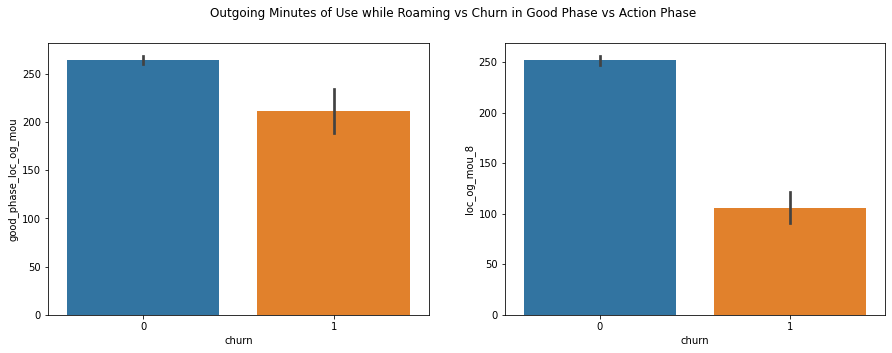

In [65]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

fig.suptitle('Outgoing Minutes of Use while Roaming vs Churn in Good Phase vs Action Phase')

sns.barplot(x = data['churn'], y = data['good_phase_loc_og_mou'], ax=axes[0])
sns.barplot(x = data['churn'], y= data['loc_og_mou_8'], ax=axes[1])
plt.show()

**Inference: It is quite evident from the above plot that Outgoing Minutes of Use while roaming has drastically dropped for churners but seems to be constant for non churners in the Action Phase as compared to Good Phase.**

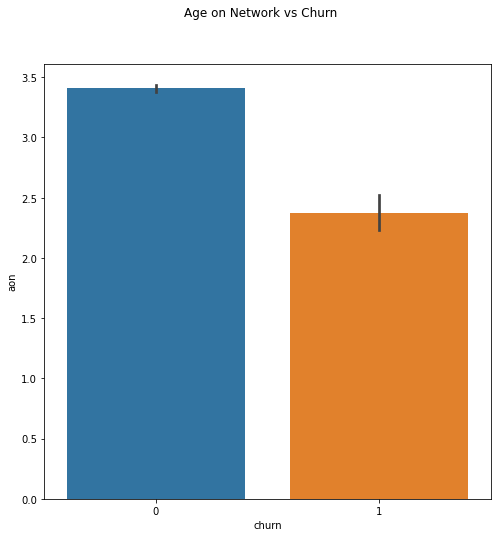

In [66]:
fig, axes = plt.subplots(figsize=(8, 8))

fig.suptitle('Age on Network vs Churn')

sns.barplot(x = data['churn'], y = data['aon'])
plt.show()

**Inference: It is quite evident that people who have been with the telecom company for longer seem to stay(non-churners). I can aslo be said that people who are likely to churn aren't from the oldest of the customers.**

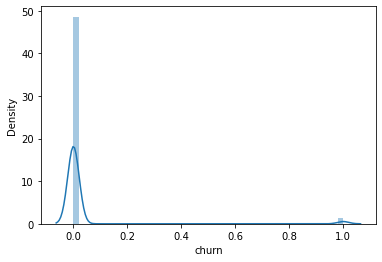

In [67]:
# checking the distribution of target variables
sns.distplot(data['churn'])
plt.show()

- A high imbalance in target variable is observed where the number of non churner in the dataset is around 94%.
- We will use SMOTE algorithim to handle the imbalance.

## Data Preperation

In [70]:
# Cap the features with high outliers

col_uppr_lmt = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ), 
               ('aon', 3000), ('total_mou_8', 4000), ('good_phase_loc_ic_mou', 3000), ('good_phase_last_day_rch_amt', 1000 ), 
               ('good_phase_std_og_mou', 4000), ('good_phase_max_rech_amt', 1500), ('good_phase_loc_og_mou', 3000), ('good_phase_arpu', 7000)]

for col, value in col_uppr_lmt:
    data[col] = data[col].apply(lambda x : x if x < value else value)

data[col_boxplot].head()

,arpu_8,loc_og_mou_8,max_rech_amt_8,last_day_rch_amt_8,aon,total_mou_8,good_phase_loc_ic_mou,good_phase_last_day_rch_amt,good_phase_std_og_mou,good_phase_max_rech_amt,good_phase_loc_og_mou,good_phase_arpu
7,3171.480,255.79,1000,779,2.2,378.20,391.555,0.0,68.000,1185.0,478.035,1209.5150
8,137.362,63.04,30,10,0.9,171.56,52.630,25.0,136.870,122.0,333.135,435.4720
21,637.760,129.74,50,50,2.0,1068.53,106.505,25.0,848.990,50.0,95.565,556.1030
23,366.966,182.14,179,0,1.7,239.47,145.520,89.5,4.355,89.5,132.795,134.1235
33,409.230,0.00,455,455,3.6,0.00,2.180,126.0,0.000,753.5,0.000,1669.9265


In [71]:
y = data['churn']
X= data.drop('churn',axis=1)

## Standardisation

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

## Handelling Class Imbalance

In [73]:
data.churn.value_counts()

0    27368
1      795
Name: churn, dtype: int64

In [74]:
# Applying SMOTE to take care of class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state= 45)
X_res, y_res = sm.fit_resample(X,y)

In [75]:
y_res.value_counts()

1    27368
0    27368
Name: churn, dtype: int64

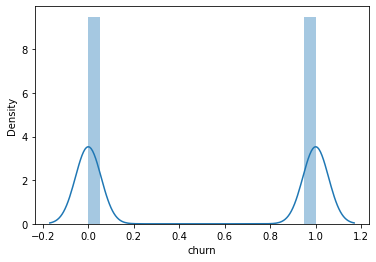

In [76]:
sns.distplot(y_res)
plt.show()

- class are balanced and target vairables are also not skwed


## Principal Component Analysis

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 25)
X_pca= pca.fit_transform(X_res)
X_pca.shape

(54736, 25)

# Model building

## 1. Logistic regression 

**Logistic Regression will help us in identifying the features along with their importance. With this information the company will be able to decide how to weigh different attributes while determining the customers who are likely to churn.**

In [78]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_res, y_res, train_size=0.7, test_size=0.3, random_state=25)

In [79]:
import statsmodels.api as sm
logm1 = sm.GLM(y_train_log,(sm.add_constant(X_train_log)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38315
Model:                            GLM   Df Residuals:                    38259
Model Family:                Binomial   Df Model:                           55
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17739.
Date:                Tue, 07 Jun 2022   Deviance:                       35479.
Time:                        01:18:49   Pearson chi2:                 7.98e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.4009      0.022    -63.847      0.000      -1.444      -1.358
arpu_8                          0.4714      0.048      9.898      0.000       0.378       0.565
roam_ic_mou_8                  -0.4246      0.035    -12.037      0.000      -0.494      -0.355
roam_og_mou_8                  -0.0073      0.032     -0.227      0.820      -0.071       0.056
loc_og_t2c_mou_8                0.0742      0.023      3.228      0.001       0.029       0.119
loc_og_mou_8                   -0.4038      0.087     -4.657      0.000      -0.574      -0.234
std_og_t2f_mou_8               -0.0534      0.036     -1.476      0.140      -0.124       0.017
std_og_mou_8                   -0.0845      0.119     -0.713      0.476      -0.317       0.148
isd_og_mou_8                   -0.1393      0.060     -2.323      0.020      -0.257      -0.022
spl_og_mou_8                   -0.1415      0.033     -4.296      0.000      -0.206      -0.077
og_others_8                     0.1185      0.027      4.362      0.000       0.065       0.172
loc_ic_mou_8                   -1.6813      0.058    -28.989      0.000      -1.795      -1.568
std_ic_t2t_mou_8               -0.6252      0.064     -9.839      0.000      -0.750      -0.501
std_ic_t2f_mou_8               -0.1334      0.050     -2.693      0.007      -0.230      -0.036
std_ic_mou_8                   -0.0893      0.043     -2.084      0.037      -0.173      -0.005
spl_ic_mou_8                   -0.2810      0.023    -12.425      0.000      -0.325      -0.237
isd_ic_mou_8                   -0.1147      0.026     -4.334      0.000      -0.167      -0.063
ic_others_8                     0.1727      0.031      5.656      0.000       0.113       0.233
total_rech_num_8               -0.4448      0.033    -13.360      0.000      -0.510      -0.380
max_rech_amt_8                  0.2019      0.024      8.519      0.000       0.155       0.248
last_day_rch_amt_8             -0.6279      0.022    -28.249      0.000      -0.671      -0.584
vol_2g_mb_8                    -0.2934      0.030     -9.860      0.000      -0.352      -0.235
monthly_2g_8                   -0.5781      0.027    -21.073      0.000      -0.632      -0.524
sachet_2g_8                    -0.6114      0.030    -20.313      0.000      -0.670      -0.552
monthly_3g_8                   -0.8836      0.037    -24.043      0.000      -0.956      -0.812
sachet_3g_8                    -0.4987      0.038    -13.217      0.000      -0.573      -0.425
aon                            -0.4067      0.017    -24.549      0.000      -0.439      -0.374
aug_vbc_3g                     -0.1682      0.032     -5.263      0.000      -0.231      -0.106
total_mou_8                    -0.7497      0.133     -5.652      0.000      -1.010      -0.490
good_phase_

**Since there are a lot of attributes, it will be better to use Recursive Feature Elimination (RFE)**

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(solver='liblinear')

# Run RFE for 25 features
rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(X_train_log, y_train_log)


In [81]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'total_mou_8',
       'good_phase_std_og_mou', 'good_phase_loc_ic_mou',
       'good_phase_total_rech_num', 'good_phase_sachet_3g',
       'good_phase_monthly_3g', 'good_phase_loc_og_mou',
       'good_phase_vol_2g_mb', 'good_phase_total_mou',
       'good_phase_roam_og_mou'],
      dtype='object')

In [82]:
# Building a  model with RFE selected features
X_train_sm = sm.add_constant(X_train_log[rfe_col])
logm2 = sm.GLM(y_train_log,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38315
Model:                            GLM   Df Residuals:                    38289
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18000.
Date:                Tue, 07 Jun 2022   Deviance:                       35999.
Time:                        01:19:30   Pearson chi2:                 2.15e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.3310      0.021    -63.176      0.000      -1.372      -1.290
arpu_8                        0.3716      0.031     11.855      0.000       0.310       0.433
roam_ic_mou_8                -0.3509      0.026    -13.639      0.000      -0.401      -0.300
loc_og_mou_8                 -0.3304      0.047     -7.043      0.000      -0.422      -0.238
loc_ic_mou_8                 -1.7255      0.057    -30.161      0.000      -1.838      -1.613
std_ic_t2t_mou_8             -0.3471      0.039     -8.807      0.000      -0.424      -0.270
spl_ic_mou_8                 -0.2889      0.022    -12.858      0.000      -0.333      -0.245
total_rech_num_8             -0.4983      0.031    -15.904      0.000      -0.560      -0.437
max_rech_amt_8                0.2456      0.021     11.426      0.000       0.203       0.288
last_day_rch_amt_8           -0.6271      0.022    -28.999      0.000      -0.670      -0.585
vol_2g_mb_8                  -0.2632      0.029     -8.992      0.000      -0.321      -0.206
monthly_2g_8                 -0.6760      0.024    -27.750      0.000      -0.724      -0.628
sachet_2g_8                  -0.4690      0.023    -20.633      0.000      -0.514      -0.424
monthly_3g_8                 -0.9227      0.035    -26.443      0.000      -0.991      -0.854
sachet_3g_8                  -0.5335      0.038    -14.062      0.000      -0.608      -0.459
aon                          -0.4083      0.016    -25.263      0.000      -0.440      -0.377
total_mou_8                  -0.7864      0.036    -21.785      0.000      -0.857      -0.716
good_phase_std_og_mou         0.9102      0.172      5.299      0.000       0.574       1.247
good_phase_loc_ic_mou         0.8578      0.040     21.418      0.000       0.779       0.936
good_phase_total_rech_num     0.3291      0.024     13.942      0.000       0.283       0.375
good_phase_sachet_3g          0.2574      0.023     11.354      0.000       0.213       0.302
good_phase_monthly_3g         0.2702      0.023     11.933      0.000       0.226       0.315
good_phase_loc_og_mou         0.7731      0.109      7.085      0.000       0.559       0.987
good_phase_vol_2g_mb          0.2323      0.020     11.517      0.000       0.193       0.272
good_phase_total_mou         -0.7750      0.195     -3.965      0.000      -1.158      -0.392
good_phase_roam_og_mou        0.2954      0.032      9.191      0.000       0.232       0.358
=============================================================================================
"""

In [83]:
# Predicting on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train_log.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.908257,1
1,0,0.024145,0
2,0,0.301707,0
3,0,0.767276,1
4,1,0.696001,1


In [84]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, 
                                     y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14686  4424]
 [ 3464 15741]]

Accuracy : 0.7941276262560355


In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_log[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[rfe_col].values, i) for i in range(X_train_log[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,good_phase_total_mou,92.76
16,good_phase_std_og_mou,81.61
21,good_phase_loc_og_mou,25.61
15,total_mou_8,4.42
2,loc_og_mou_8,4.35
0,arpu_8,4.12
3,loc_ic_mou_8,3.75
17,good_phase_loc_ic_mou,3.41
6,total_rech_num_8,3.16
24,good_phase_roam_og_mou,2.89


**Dropping the attribute whose VIF is >5. This process will continue untill all the variables have a VIF <= 5.**

In [86]:
rfe_col = rfe_col.drop('total_mou_8', 1)

In [87]:
# Build new model
X_train_sm = sm.add_constant(X_train_log[rfe_col])
logm3 = sm.GLM(y_train_log,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38315
Model:                            GLM   Df Residuals:                    38290
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18266.
Date:                Tue, 07 Jun 2022   Deviance:                       36533.
Time:                        01:19:35   Pearson chi2:                 1.59e+07
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.3173      0.021    -62.418      0.000      -1.359      -1.276
arpu_8                        0.0770      0.027      2.878      0.004       0.025       0.129
roam_ic_mou_8                -0.3249      0.025    -13.133      0.000      -0.373      -0.276
loc_og_mou_8                 -0.5927      0.045    -13.192      0.000      -0.681      -0.505
loc_ic_mou_8                 -1.7950      0.058    -31.093      0.000      -1.908      -1.682
std_ic_t2t_mou_8             -0.4035      0.040     -9.989      0.000      -0.483      -0.324
spl_ic_mou_8                 -0.2921      0.022    -13.043      0.000      -0.336      -0.248
total_rech_num_8             -0.7513      0.030    -25.012      0.000      -0.810      -0.692
max_rech_amt_8                0.3007      0.021     14.234      0.000       0.259       0.342
last_day_rch_amt_8           -0.6387      0.022    -29.602      0.000      -0.681      -0.596
vol_2g_mb_8                  -0.2548      0.029     -8.726      0.000      -0.312      -0.198
monthly_2g_8                 -0.6499      0.024    -26.555      0.000      -0.698      -0.602
sachet_2g_8                  -0.4305      0.023    -18.816      0.000      -0.475      -0.386
monthly_3g_8                 -0.8537      0.035    -24.601      0.000      -0.922      -0.786
sachet_3g_8                  -0.4772      0.038    -12.568      0.000      -0.552      -0.403
aon                          -0.3960      0.016    -24.588      0.000      -0.428      -0.364
good_phase_std_og_mou         0.2415      0.157      1.536      0.125      -0.067       0.550
good_phase_loc_ic_mou         0.9375      0.040     23.197      0.000       0.858       1.017
good_phase_total_rech_num     0.5098      0.023     22.536      0.000       0.465       0.554
good_phase_sachet_3g          0.2257      0.023     10.006      0.000       0.181       0.270
good_phase_monthly_3g         0.2748      0.023     12.172      0.000       0.231       0.319
good_phase_loc_og_mou         0.5260      0.101      5.191      0.000       0.327       0.725
good_phase_vol_2g_mb          0.2207      0.020     10.941      0.000       0.181       0.260
good_phase_total_mou         -0.3677      0.181     -2.034      0.042      -0.722      -0.013
good_phase_roam_og_mou        0.1984      0.030      6.661      0.000       0.140       0.257
=============================================================================================
"""

In [88]:
# Prediction on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train_log.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.940554,1
1,0,0.046911,0
2,0,0.448066,0
3,0,0.723847,1
4,1,0.722088,1


In [89]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14475  4635]
 [ 3428 15777]]

Accuracy : 0.7895602244551743


In [90]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_log[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[rfe_col].values, i) for i in range(X_train_log[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,good_phase_total_mou,92.74
15,good_phase_std_og_mou,80.42
20,good_phase_loc_og_mou,25.59
2,loc_og_mou_8,3.85
3,loc_ic_mou_8,3.75
16,good_phase_loc_ic_mou,3.40
0,arpu_8,3.39
23,good_phase_roam_og_mou,2.88
6,total_rech_num_8,2.75
7,max_rech_amt_8,2.49


In [91]:
# Drop 'gd_ph_total_mou'
rfe_col = rfe_col.drop('good_phase_total_mou', 1)

In [92]:
# Build new model
X_train_sm = sm.add_constant(X_train_log[rfe_col])
logm4 = sm.GLM(y_train_log,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38315
Model:                            GLM   Df Residuals:                    38291
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18269.
Date:                Tue, 07 Jun 2022   Deviance:                       36537.
Time:                        01:19:38   Pearson chi2:                 1.75e+07
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.3157      0.021    -62.425      0.000      -1.357      -1.274
arpu_8                        0.0634      0.026      2.442      0.015       0.012       0.114
roam_ic_mou_8                -0.3234      0.025    -13.075      0.000      -0.372      -0.275
loc_og_mou_8                 -0.5899      0.045    -13.163      0.000      -0.678      -0.502
loc_ic_mou_8                 -1.7914      0.058    -31.073      0.000      -1.904      -1.678
std_ic_t2t_mou_8             -0.4030      0.040     -9.988      0.000      -0.482      -0.324
spl_ic_mou_8                 -0.2924      0.022    -13.054      0.000      -0.336      -0.248
total_rech_num_8             -0.7437      0.030    -24.998      0.000      -0.802      -0.685
max_rech_amt_8                0.3009      0.021     14.244      0.000       0.259       0.342
last_day_rch_amt_8           -0.6360      0.022    -29.548      0.000      -0.678      -0.594
vol_2g_mb_8                  -0.2541      0.029     -8.708      0.000      -0.311      -0.197
monthly_2g_8                 -0.6495      0.024    -26.539      0.000      -0.697      -0.602
sachet_2g_8                  -0.4318      0.023    -18.883      0.000      -0.477      -0.387
monthly_3g_8                 -0.8505      0.035    -24.543      0.000      -0.918      -0.783
sachet_3g_8                  -0.4767      0.038    -12.567      0.000      -0.551      -0.402
aon                          -0.3957      0.016    -24.567      0.000      -0.427      -0.364
good_phase_std_og_mou        -0.0772      0.015     -5.150      0.000      -0.107      -0.048
good_phase_loc_ic_mou         0.9354      0.040     23.151      0.000       0.856       1.015
good_phase_total_rech_num     0.5049      0.022     22.477      0.000       0.461       0.549
good_phase_sachet_3g          0.2251      0.023      9.995      0.000       0.181       0.269
good_phase_monthly_3g         0.2736      0.023     12.128      0.000       0.229       0.318
good_phase_loc_og_mou         0.3309      0.033     10.137      0.000       0.267       0.395
good_phase_vol_2g_mb          0.2195      0.020     10.893      0.000       0.180       0.259
good_phase_roam_og_mou        0.1471      0.016      9.328      0.000       0.116       0.178
=============================================================================================
"""

In [93]:
# Prediction on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train_log.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.940353,1
1,0,0.046785,0
2,0,0.448116,0
3,0,0.723296,1
4,1,0.722404,1


In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14475  4635]
 [ 3434 15771]]

Accuracy : 0.7894036278220018


In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_log[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[rfe_col].values, i) for i in range(X_train_log[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_og_mou_8,3.85
3,loc_ic_mou_8,3.74
16,good_phase_loc_ic_mou,3.40
20,good_phase_loc_og_mou,3.38
0,arpu_8,3.26
6,total_rech_num_8,2.72
7,max_rech_amt_8,2.48
17,good_phase_total_rech_num,2.16
8,last_day_rch_amt_8,1.88
9,vol_2g_mb_8,1.84


**Since all the attributes have a VIF lower than 5, we can proceed with this model.**

In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# checking sensitivity of our logistic regression mode
TP / float(TP+FN)


0.8211923978130695

In [98]:
# Checking specificity of our logistic regression mode
TN / float(TN+FP)

0.7574568288854003

In [99]:
# Checking false postive rate - predicting churn when customer does not have churned
FP/ float(TN+FP)

0.2425431711145997

In [100]:
# checking posivtive predictive value
TP/float(TP+FP)

0.7728609232578654

In [101]:
# checking negative predictive value
TN / float(TN+ FN)

0.8082528337707298

**Plotting ROC**

In [102]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

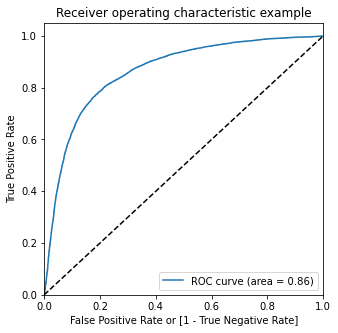

In [103]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

**Checking what will be the optimal cut-off probability.** 

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.940353,1,1,1,1,1,1,1,1,1,1,1
1,0,0.046785,0,1,0,0,0,0,0,0,0,0,0
2,0,0.448116,0,1,1,1,1,1,0,0,0,0,0
3,0,0.723296,1,1,1,1,1,1,1,1,1,0,0
4,1,0.722404,1,1,1,1,1,1,1,1,1,0,0


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.501240  1.000000  0.000000
0.1   0.1  0.628840  0.979901  0.276033
0.2   0.2  0.694193  0.955741  0.431345
0.3   0.3  0.741537  0.923562  0.558608
0.4   0.4  0.772648  0.879563  0.665201
0.5   0.5  0.789404  0.821192  0.757457
0.6   0.6  0.790683  0.740536  0.841078
0.7   0.7  0.758893  0.613278  0.905233
0.8   0.8  0.677750  0.403280  0.953585
0.9   0.9  0.549915  0.115126  0.986866


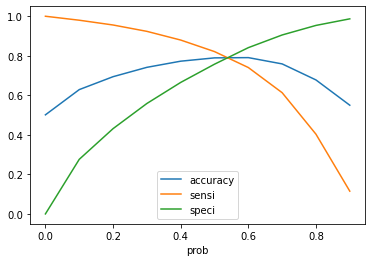

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**Drilling down further to investigate with probability values between 0.50 and 0.59.**

In [107]:
numbers = [0.5,0.51,0.52,0.53,0.54,0.55, 0.56, 0.5,0.58,0.59,0.6]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.58,0.59
0,1,0.940353,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.046785,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.448116,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.723296,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1
4,1,0.722404,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1


In [108]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.5,0.51,0.52,0.53,0.54,0.55, 0.56, 0.5,0.58,0.59,0.6]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.50  0.50  0.789404  0.821192  0.757457
0.51  0.51  0.790865  0.815621  0.765986
0.52  0.52  0.792770  0.809633  0.775824
0.53  0.53  0.793371  0.802551  0.784144
0.54  0.54  0.792901  0.793023  0.792779
0.55  0.55  0.793266  0.784900  0.801675
0.56  0.56  0.793110  0.775579  0.810727
0.58  0.58  0.793214  0.758813  0.827786
0.59  0.59  0.791518  0.749440  0.833804
0.60  0.60  0.790683  0.740536  0.841078


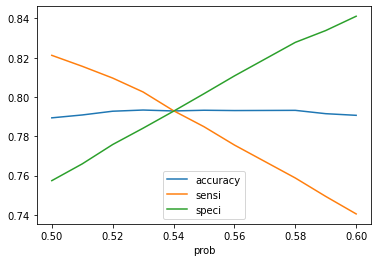

In [109]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**As it is evident enough from the plot, 0.54 is the optimal cut-off probability.**

In [110]:
X_test_log = X_test_log[rfe_col]
X_test_sm = sm.add_constant(X_test_log)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test_log.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.54 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
44484,1,0.212218,0
44515,1,0.075452,0
41746,1,0.662536,1
32056,1,0.701744,1
49738,1,0.645391,1


In [111]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

[[6555 1703]
 [1712 6451]]

Accuracy : 0.7920345898544546


**According to our optimal Logistic Regression model, the top 10 predictors are:**

In [112]:
# Top 10 predictors

abs(res.params).sort_values(ascending=False)[0:11]

loc_ic_mou_8                 1.791440
const                        1.315674
good_phase_loc_ic_mou        0.935384
monthly_3g_8                 0.850519
total_rech_num_8             0.743656
monthly_2g_8                 0.649488
last_day_rch_amt_8           0.636049
loc_og_mou_8                 0.589886
good_phase_total_rech_num    0.504898
sachet_3g_8                  0.476705
sachet_2g_8                  0.431785
dtype: float64

**When we choose, 0.54 as the cut-off probability, the accuracy, specificity and sensitivity all settle around 79%.**


## 2. Decision Tree using PCA

In [113]:
# Spliting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=25)

In [114]:
from sklearn.tree import DecisionTreeClassifier

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.8824220279263996
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      8258
           1       0.81      0.89      0.85      8163

    accuracy                           0.84     16421
   macro avg       0.85      0.84      0.84     16421
weighted avg       0.85      0.84      0.84     16421



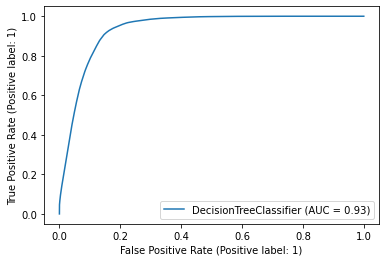

In [115]:
# Plot ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(intial_dt, X_train, y_train, drop_intermediate=False)
plt.show()

In [116]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [117]:
grid_search.best_score_

0.88855544351637

In [118]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=30, random_state=42)

In [119]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      8258
           1       0.88      0.93      0.90      8163

    accuracy                           0.90     16421
   macro avg       0.90      0.90      0.90     16421
weighted avg       0.90      0.90      0.90     16421



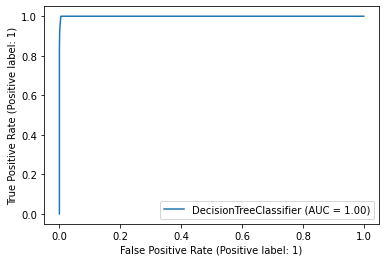

In [120]:
# ROC
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

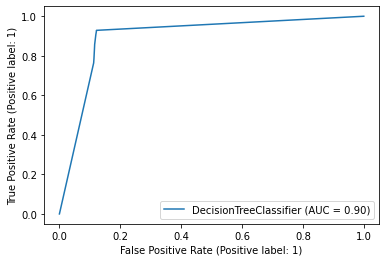

In [121]:
# ROC
plot_roc_curve(dt_best, X_test, y_test)
plt.show()

- 90% accuracy is obtained through decision tree model

**Since it is a good possibility for the Decision Tree to overfit, it will be a better to idea to consider an ensemble method like Random Forest Classifier for better results.**

# 3. Random Forest

Train accuracy : 0.8824220279263996
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      8258
           1       0.87      0.93      0.90      8163

    accuracy                           0.90     16421
   macro avg       0.90      0.90      0.90     16421
weighted avg       0.90      0.90      0.90     16421



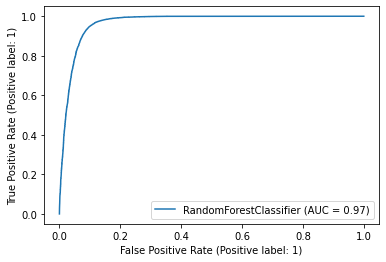

In [122]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
plot_roc_curve(rf, X_train, y_train)
plt.show()

**Hyper Parameter Tuning**

In [123]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [124]:
grid_search.best_score_

0.9447214524115067

In [125]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [126]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      8258
           1       0.94      0.97      0.95      8163

    accuracy                           0.95     16421
   macro avg       0.95      0.95      0.95     16421
weighted avg       0.95      0.95      0.95     16421



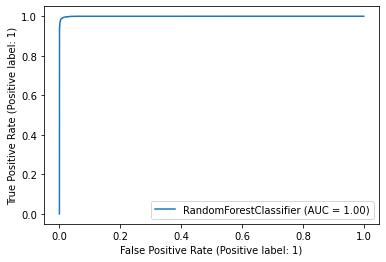

In [127]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

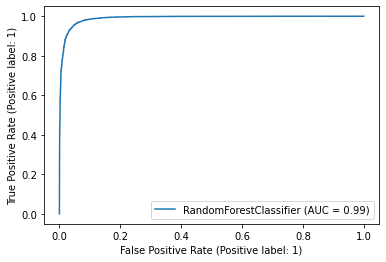

In [128]:
plot_roc_curve(rf_best, X_test, y_test)
plt.show()

- 95% accuracy is observed on test data with Random Forest

## 4. Adaboost

In [129]:
from sklearn.ensemble import AdaBoostClassifier
# Create a shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.6914317033067414

In [130]:
# Adaboost with shallow tree as base estimator

# Define the number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = num_est, random_state=25)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    adaboost_scores.append(score)

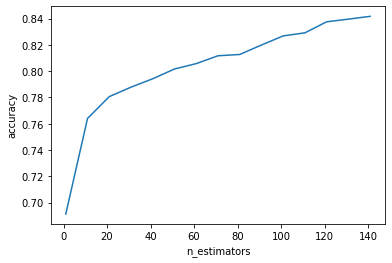

In [131]:
# Plot the scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [132]:
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 200, random_state=25)
adaboost_best.fit(X_train, y_train)
y_pred = adaboost_best.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      8258
           1       0.94      0.97      0.95      8163

    accuracy                           0.95     16421
   macro avg       0.95      0.95      0.95     16421
weighted avg       0.95      0.95      0.95     16421



**Comparing both the Random Forest and Adaboost models, it is quite evident that Adaboost does not have much to offer above the Random Forest Model.**

**Therefore, keeping simplicity in mind, it will be a good idea to proceed with Random Forest as the final model in the current state of analysis.**

**Final Model**

In [133]:
final_model = RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [134]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)



# Print the report
print("Report on train data")
print(metrics.classification_report(y_train, y_train_pred))

print("Report on test data")
print(metrics.classification_report(y_test, y_test_pred))

Report on train data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19110
           1       0.98      1.00      0.99     19205

    accuracy                           0.99     38315
   macro avg       0.99      0.99      0.99     38315
weighted avg       0.99      0.99      0.99     38315

Report on test data
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      8258
           1       0.94      0.97      0.95      8163

    accuracy                           0.95     16421
   macro avg       0.95      0.95      0.95     16421
weighted avg       0.95      0.95      0.95     16421



In [135]:
Summary_DataFrame = pd.DataFrame(abs(res.params).sort_values(ascending=False)[0:12])
Summary_DataFrame.reset_index(inplace=True)
Summary_DataFrame.columns=['Features','Coefficients']
Summary_DataFrame = Summary_DataFrame.iloc[1:]
Summary_DataFrame['Impact %'] = Summary_DataFrame['Coefficients'].apply(lambda x: round((x/sum(Summary_DataFrame['Coefficients'])*100),2))
Summary_DataFrame = Summary_DataFrame.sort_values(by='Impact %', ascending=False)
Summary_DataFrame

,Features,Coefficients,Impact %
1,const,1.315674,17.46
2,good_phase_loc_ic_mou,0.935384,12.41
3,monthly_3g_8,0.850519,11.28
4,total_rech_num_8,0.743656,9.87
5,monthly_2g_8,0.649488,8.62
6,last_day_rch_amt_8,0.636049,8.44
7,loc_og_mou_8,0.589886,7.83
8,good_phase_total_rech_num,0.504898,6.70
9,sachet_3g_8,0.476705,6.32
10,sachet_2g_8,0.431785,5.73


## Recommendations and Suggestions

**According to the feature importances as given by the Logistic Regression Model, the following recommendationsare made:** 

**1. Local Incoming Minutes of Use seems to be impacting the churn by 11%. The company needs to keep an eye out on all the customers whose Local Incoming Minutes of Usage drop from `Good Phase` to `Action Phase`.**

**2. Internet recharge (both 2G and 3G) for both the `Good Phase, i.e. 6th and 7th Month` and `Action Phase, i.e. 8th month`, is another factor that influences the churn collectively by a whopping 31%. The company needs to keep an eye out for customers when they see a drop in their internet recharge patterns and start extending offers in an attempt to retain them. Monthly recharge(both 2G and 3G) weigh more(around 20%) as compared to Sachet racherge(around 11%). The company should find ways to attract more customers to make monthly internet recherge.**

**3. The company also needs to check on those customers whose `incoming calls from the same operator and outside the calling circle start dropping`. They have an impact of around 10%.**

**4. `Total Recharge Number` is another feature that the company needs to take care of both in the `Good and Action Phase` as they have a collective impact of 15.8%.**

**5. `Last day recharge amount` and `Local outgoing minutes of use` are another two important features for the `Action Phase` and collectively amount to 15.64%.**